<a href="https://colab.research.google.com/github/mslater21/SNA-Project/blob/main/bipartite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph creation

In [23]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
characters = pd.read_csv('marvel_characters.csv')
titles = pd.read_csv('marvel_titles.csv')

In [3]:
characters.head()

,title,character,character_alias,actor
0,Captain America: The First Avenger,Captain America,Steve Rogers,Chris Evans
1,Captain America: The First Avenger,Peggy Carter,NaN,Hayley Atwell
2,Captain America: The First Avenger,James Buchanan 'Bucky' Barnes,NaN,Sebastian Stan
3,Captain America: The First Avenger,Colonel Chester Phillips,NaN,Tommy Lee Jones
4,Captain America: The First Avenger,Johann Schmidt,Red Skull,Hugo Weaving


In [10]:
G = nx.Graph()

In [11]:
for index, row in titles.iterrows():
  G.add_node(row['title'] + '*', bipartite=0, media_type=row['type'], release_year=row['release_year'], release_month=row['release_month'], release_day=row['release_day'], rating=row['rating'], length=row['length'], starts=row['stars'], genres=row['genres'])

In [12]:
for index, row in characters.iterrows():
  G.add_node(row['character'], bipartite=1, alias=row['character_alias'], actor=row['actor'])

In [13]:
for index, row in characters.iterrows():
  G.add_edge(row['title'] + '*', row['character'])

In [59]:
character_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(G) - character_nodes

# Graph Statistics

## Graph Makeup

In [73]:
print('Total number of nodes:', G.number_of_nodes())
print('Total number of edges:', G.number_of_edges())

print('Number of character nodes:', len(character_nodes))
print('Number of title nodes:', len(title_nodes))

Total number of nodes: 1933
Total number of edges: 2307
Number of character nodes: 1873
Number of title nodes: 60


## Density

In [60]:
print('Density:', nx.bipartite.density(G, character_nodes))

Density: 0.020528563801388146


## Degrees

In [67]:
title_degrees, character_degrees = nx.bipartite.degrees(G, character_nodes)

### Character Nodes

In [68]:
# Average Degree
sum([d for (n,d) in character_degrees]) / len(character_nodes)

1.2317138280832889

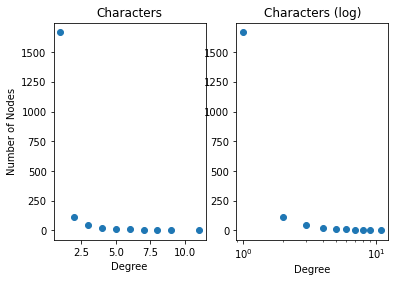

In [69]:
# Node Degree Distribution

fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in character_degrees], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Characters')

ax[1].scatter(*np.unique([d for (n,d) in character_degrees], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Characters (log)')
ax[1].set_xscale('log')

### Title Nodes

In [70]:
# Average Degree
sum([d for (n,d) in title_degrees]) / len(title_nodes)

38.45

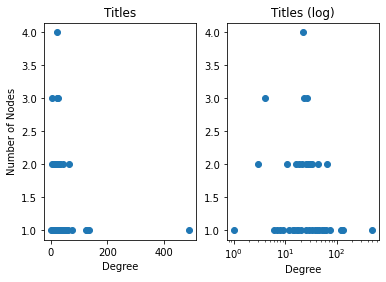

In [71]:
# Node Degree Distribution
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in title_degrees], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Titles')

ax[1].scatter(*np.unique([d for (n,d) in title_degrees], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Titles (log)')
ax[1].set_xscale('log')

# Character Projected Graph


In [75]:
G_char = nx.bipartite.projected_graph(G, character_nodes)
print(G_char)

Graph with 1873 nodes and 168694 edges


In [77]:
# Average Degree
sum([d for (n,d) in nx.degree(G_char)]) / G_char.number_of_nodes()

180.13240790176187

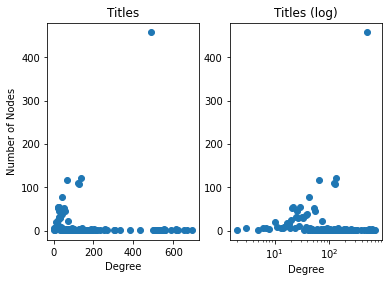

In [78]:
# Node Degree Distribution
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in nx.degree(G_char)], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Titles')

ax[1].scatter(*np.unique([d for (n,d) in nx.degree(G_char)], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Titles (log)')
ax[1].set_xscale('log')

In [87]:
# Components
components = nx.connected_components(G_char)
for component in components:
  print(component)

{'The Other', 'Soldier #1', 'Hela', 'Sheriff Hardin', 'Durant', 'Spider', 'James Wesley', 'Mordo', 'Mary Walker', 'Joey Gutierrez', 'Misty Knight', 'Chuck Donelan', 'Roy Healy', 'Ruben', 'Blake Tower', 'Agent Ryan', 'Ray Nadeem', 'Dum-Dum Dugan', 'Dog of Hell', 'Kith Lyonne', 'Sophia', 'Mita Nansari', 'Captain William Dole', 'Agent Hauer', 'Rocket', 'Tina', 'Senator Ellen Nadeer', 'Iwua', 'Tat', 'Qajax', 'Tullk', 'Hogan', 'Jesse Fletcher', 'Trevor Slattery', 'Alya', 'Yon-Rogg', 'Halfnut', 'Sami Nadeem', 'Gillian', 'Katy', 'Agent Prince', 'Serious Man', 'Corvus Glaive', 'General Fischer', 'Martinex', 'Dr. Bill Foster', 'Mrs. Elizabeth De Luca', 'Ronald Garcia', 'Security Chief Liu', 'Young Wilson Fisk', 'Mama Donya', 'William May', 'Agent Burleigh', 'Robert', 'Saleem', 'Colonel James Rhodes', 'Danny Rand', 'Alpha Dog', 'Laurent Lyonne', 'Young Yelena', 'Thanos', 'Vijay Nadeer', 'Detective Rivera', 'Dwayne Blaskowski', 'The Watcher', 'Agent Deever', 'Robert Gonzales', 'Officer Carvalho',

In [92]:
#Diameter of largest component
components = sorted(nx.connected_components(G_char), key=len, reverse=True)
diameter = nx.diameter(G_char.subgraph(components[0]))
print('Diameter of largest connected component:', diameter)

Diameter of largest connected component: 5


In [94]:
# Average shortest path length of largest component
components = sorted(nx.connected_components(G_char), key=len, reverse=True)
nx.average_shortest_path_length(G_char.subgraph(components[0]))

2.5147995569088657

In [102]:
# What is that crazy outlier?
print(sorted(G_char.degree(), key=lambda pair: pair[1], reverse=True))

# Looks like its pretty much all of the Agents of S.H.I.E.L.D characters. The relationships would probably be better if we could split up characters by episode, but we don't really have any way to do that. Could talk about possible ways to deal with that in the report.

[('Nick Fury', 696), ('Peggy Carter', 668), ('Maria Hill', 652), ('Mouse', 624), ('Joe', 624), ('Sergei', 614), ('Thomas', 614), ('Ruby', 614), ('Jerry', 614), ('Marilyn', 612), ('Jackson', 612), ('Rick', 591), ('Dum Dum Dugan', 560), ('Lady Sif', 559), ('Brick', 559), ('Gunner', 554), ('Diego', 553), ('Daniel Sousa', 552), ('Agent Fisher', 552), ('Agent Ford', 552), ('Darryl', 545), ('Tiny', 534), ('Noah', 533), ('Assistant', 530), ('Bruno', 523), ('Dr. List', 519), ('President Ellis', 517), ('Ava', 515), ('Jasper Sitwell', 513), ('Li', 510), ('Ben', 510), ('Jim Morita', 504), ('Agent Anderson', 500), ('Colonel Victor Ramon', 500), ('Soldier #1', 490), ('Durant', 490), ('Joey Gutierrez', 490), ('Captain William Dole', 490), ('Agent Hauer', 490), ('Senator Ellen Nadeer', 490), ('Tat', 490), ('Qajax', 490), ('Jesse Fletcher', 490), ('Alya', 490), ('Agent Prince', 490), ('Serious Man', 490), ('General Fischer', 490), ('William May', 490), ('Vijay Nadeer', 490), ('Robert Gonzales', 490), 